# Customer Segmentation on Mall Customers Data

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("../dataset/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [35]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
143,144,Female,32,76,87
75,76,Male,26,54,54
101,102,Female,49,62,48
184,185,Female,41,99,39
24,25,Female,54,28,14
145,146,Male,28,77,97
191,192,Female,32,103,69
180,181,Female,37,97,32
53,54,Male,59,43,60


In [36]:
data.shape

(200, 5)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
data.duplicated().sum()

np.int64(0)

In [39]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [41]:
data["Spending Score (1-100)"].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [42]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [43]:
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [44]:
gender_counts = data["Gender"].value_counts()
gender_percentage = data["Gender"].value_counts(normalize=True) * 100
print(gender_percentage)

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [45]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
128,129,Male,59,71,11
133,134,Female,31,72,71
135,136,Female,29,73,88
76,77,Female,45,54,53
52,53,Female,31,43,54
129,130,Male,38,71,75
51,52,Male,33,42,60
134,135,Male,20,73,5
56,57,Female,51,44,50


In [46]:
# dropping the unnecessary column CustomerID
data = data.drop("CustomerID", axis=1)
data.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
144,Male,25,77,12
130,Male,47,71,9
65,Male,18,48,59
109,Male,66,63,48
14,Male,37,20,13
73,Female,60,50,56
158,Male,34,78,1
164,Male,50,85,26
118,Female,51,67,43
32,Male,53,33,4


In [47]:
data["Gender"] = data["Gender"].replace(
    {
        "Male": 0,
        "Female": 1
    }
)
data.sample(10)

/tmp/ipykernel_17452/3435293700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(


,Gender,Age,Annual Income (k$),Spending Score (1-100)
32,0,53,33,4
117,1,49,65,59
19,1,35,23,98
110,0,65,63,52
1,0,21,15,81
186,1,54,101,24
115,1,19,65,50
37,1,30,34,73
125,1,31,70,77
126,0,43,71,35


In [48]:
data["Gender"].value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

In [49]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [51]:
# splitting the data
X_train, X_test = train_test_split(
    data,
    test_size=0.15,
    random_state=21
)
print(data.shape, X_train.shape, X_test.shape)

(200, 4) (170, 4) (30, 4)


In [53]:
# scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
print(X_train_scaled)

[[ 0.87797115 -0.33328257 -1.49767824  1.83054329]
 [ 0.87797115 -0.54789634  0.60945495  1.40494141]
 [ 0.87797115 -0.54789634  0.64921218  0.90195736]
 [ 0.87797115  0.4536346  -1.41816378 -1.76772719]
 [-1.13898959  1.95593102  0.05285373  0.32159116]
 [-1.13898959  2.17054479 -0.58326195  0.20551792]
 [ 0.87797115  0.31055875  0.49018326 -1.69034503]
 [ 0.87797115 -0.26174464  1.04678448 -0.91652342]
 [-1.13898959 -1.47788936  0.52994049 -1.57427179]
 [ 0.87797115  0.7397863  -0.70253364 -0.22008397]
 [-1.13898959  1.3120897   1.08654171 -1.38081638]
 [ 0.87797115 -1.47788936  0.09261096  0.12813575]
 [ 0.87797115 -1.54942728  0.17212542 -0.10401073]
 [-1.13898959 -0.19020672 -1.61694993 -1.45819854]
 [ 0.87797115  1.88439309  0.09261096 -0.02662857]
 [-1.13898959  0.59671045 -0.26520411 -0.18139289]
 [ 0.87797115 -0.47635841  1.00702725  1.71447005]
 [ 0.87797115 -0.33328257  2.35877307  1.09541277]
 [ 0.87797115  0.38209668 -1.29889209 -0.72306802]
 [ 0.87797115 -0.76251011  0.49

In [55]:
print(X_test_scaled)

[[-1.13898959 -1.04866181  0.64921218 -1.49688962]
 [ 0.87797115 -0.69097219 -1.65670716  0.8245752 ]
 [-1.13898959 -1.40635143 -1.5771927   0.59242872]
 [-1.13898959 -0.33328257 -1.45792101 -0.60699477]
 [ 0.87797115 -1.12019974 -0.86156256  0.55373764]
 [ 0.87797115 -0.33328257 -1.69646439 -1.72903611]
 [ 0.87797115 -0.61943426 -0.70253364  0.12813575]
 [-1.13898959 -1.54942728 -0.06641796 -0.37484829]
 [-1.13898959 -0.11866879  0.4106688   0.94064844]
 [ 0.87797115 -0.76251011  1.48411401  1.44363249]
 [-1.13898959 -1.04866181 -1.45792101  0.86326628]
 [-1.13898959  0.59671045 -0.86156256 -0.56830369]
 [ 0.87797115 -1.33481351  0.05285373 -0.33615721]
 [-1.13898959 -0.83404804  0.64921218  1.79185221]
 [ 0.87797115 -1.26327558 -0.14593242  0.16682684]
 [ 0.87797115  0.31055875  0.68896941 -1.18736098]
 [ 0.87797115 -1.19173766  0.37091157 -0.83914126]
 [-1.13898959  0.59671045 -0.02666073 -0.06531965]
 [ 0.87797115  0.66824838  0.05285373 -0.10401073]
 [ 0.87797115 -1.12019974 -1.61

In [58]:
# choosing the number of clusters using the elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        random_state=21,
        n_init=10
    )
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

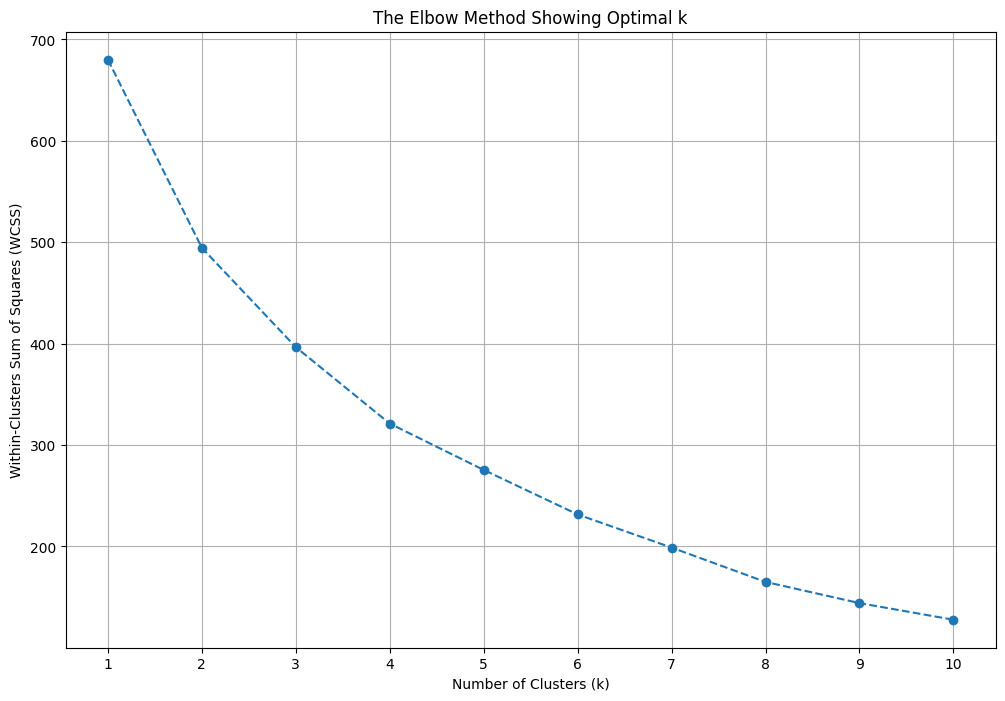

In [61]:
# plotting the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(
    k_range,
    wcss,
    marker= "o",
    linestyle="--"
)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Clusters Sum of Squares (WCSS)")
plt.title("The Elbow Method Showing Optimal k")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [62]:
# fitting with the optimal k
opt_k = 4
kmeans = KMeans(
    n_clusters=opt_k,
    init="k-means++",
    random_state=21,
    n_init=10
)
kmeans.fit(X_train_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,21
,copy_x,True
,algorithm,'lloyd'
